# A neural network for a classification with multiple labels

## import library

In [49]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import ticker, cm
import os
from tqdm import tqdm

## load data

In [50]:
directory_data  = './'
filename_data   = 'assignment_05_data.npz'
path_data       = os.path.join(directory_data, filename_data) 
data            = np.load(path_data)

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test  = np.asarray(x_test)
y_test  = np.asarray(y_test)

vec_x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vec_x_test  = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

In [51]:
print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('size of vector_x_train :', vec_x_train.shape)
print('size of vector_x_test :', vec_x_test.shape)
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
size of vector_x_train : (20000, 784)
size of vector_x_test : (8000, 784)
*************************************************


## index for each class

In [52]:
number_class        = y_train.shape[1]
length_data         = vec_x_train.shape[1]
number_data_train   = vec_x_train.shape[0]
number_data_test    = vec_x_test.shape[0]

index_train = {}
index_test  = {}

number_index_train  = np.zeros(number_class)
number_index_test   = np.zeros(number_class)

for i in range(number_class):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

In [53]:
print('*************************************************')
print('number of training data :', number_data_train)
print('length of testing data :', number_data_test)
print('*************************************************')
print('number of classes :', number_class)
print('length of data :', length_data)
print('*************************************************')
print('number of training images for each class :', number_index_train)
print('number of testing images for each class :', number_index_test)
print('*************************************************')

*************************************************
number of training data : 20000
length of testing data : 8000
*************************************************
number of classes : 10
length of data : 784
*************************************************
number of training images for each class : [2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.]
number of testing images for each class : [800. 800. 800. 800. 800. 800. 800. 800. 800. 800.]
*************************************************


## plot grey image

In [54]:
def plot_image(title, data):

    nRow = 2
    nCol = 5
    size = 2 
    
    fig, axes = plt.subplots(nRow, nCol, figsize=(size * nCol, size * nRow))
    fig.suptitle(title, fontsize=16)
    
    for i in range(nRow):
        for j in range(nCol):

            k = i * nCol + j
            axes[i, j].imshow(data[k], cmap='gray', vmin=0, vmax=1)

    plt.tight_layout()
    plt.show()

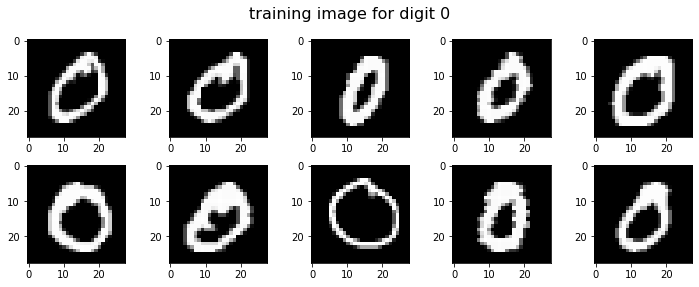

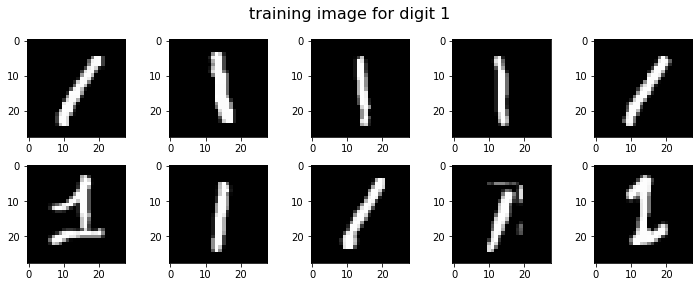

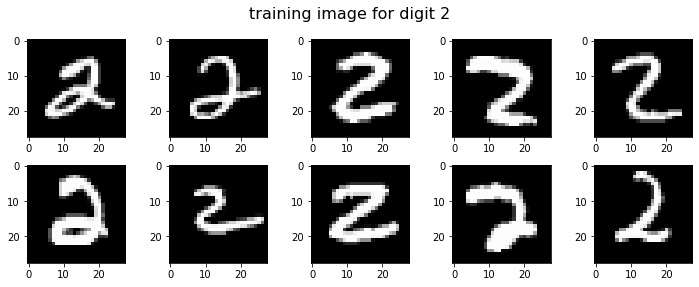

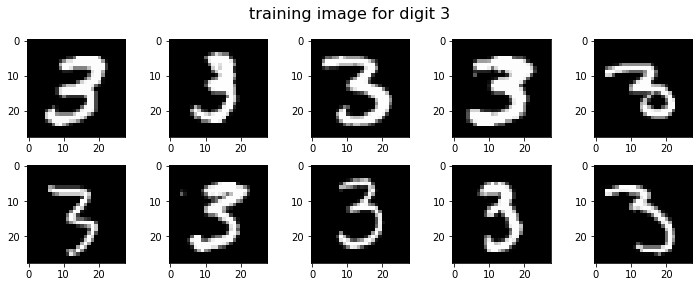

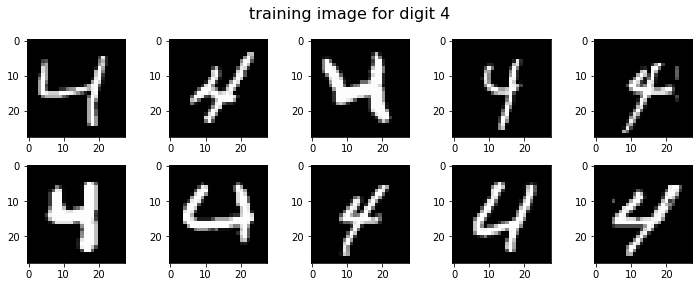

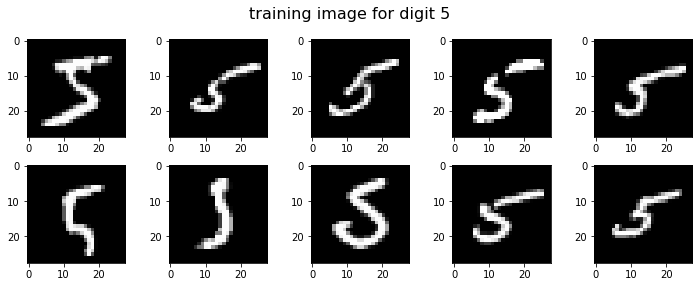

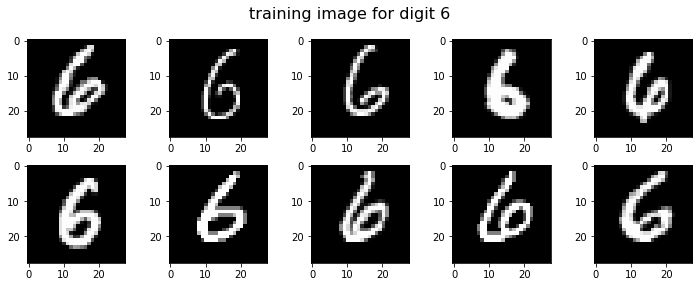

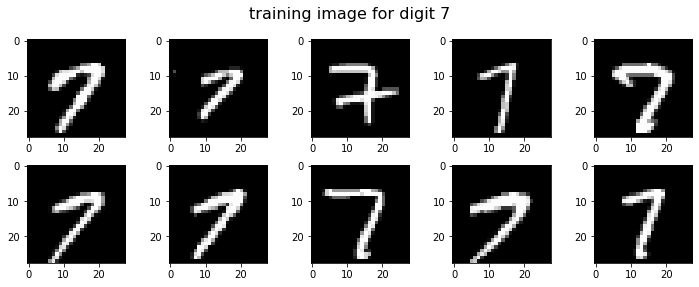

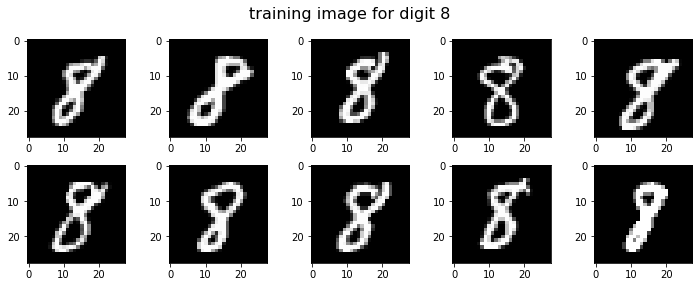

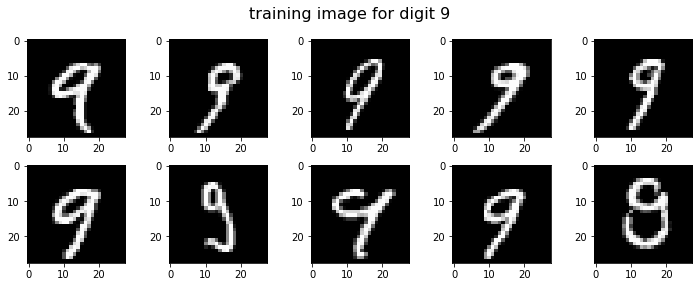

In [55]:
for c in range(number_class):

    index_class = c
    title       = 'training image for digit ' + str(index_class)
    plot_image(title, x_train[index_train[index_class][0]])

## initialize the neural network

- neural network consists of fullly connected linear layer followed by softmax activation function
- the size of the fully connected layer is input (length of data) and output (number of classes)

## initialize the weights for the fully connected layer

- create one matrix for the weights
- consider a bias in the construction of weights

In [56]:
# ================================================== 
# fill up the blank
#
size_input  = length_data + 1
size_output = number_class 
#
# ================================================== 

weight = np.ones((size_input, size_output))

In [57]:
print('size of the weight :', weight.shape)

size of the weight : (785, 10)


## initialize the data for considering a bisa

- add 1 at the end of each vectorized data

In [58]:
# ================================================== 
# fill up the blank
#
ones_train  = np.ones((number_data_train, 1))
ones_test   = np.ones((number_data_test, 1))

vec_x_train = np.concatenate([vec_x_train, ones_train],1)
vec_x_test  = np.concatenate([vec_x_test, ones_test],1)
#
# ================================================== 

In [59]:
print('size of training data :', vec_x_train.shape)
print('size of testing data :', vec_x_test.shape)

size of training data : (20000, 785)
size of testing data : (8000, 785)


## define neural network 

### define softmax function 

- input : number of data $\times$ number of classes
- output : number of data $\times$ number of classes

In [60]:
def activation_softmax(input):

# ================================================== 
# fill up the blank
#
    
    output =  np.exp(input) / np.sum(np.exp(input))
#
# ================================================== 

    return output 

### define the layer

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- output : number of data $\times$  number of classes

In [61]:
def layer_fully_connected(input, weight):

# ================================================== 
# fill up the blank
#

    output = np.matmul(input, weight)

#
# ================================================== 

    return output

## define forward propagation

- input : number of data $\times$ length of data
- weight : length of data $\times$ number of classes
- prediction : number of data $\times$  number of classes

In [62]:
def compute_prediction(input, weight):

# ================================================== 
# fill up the blank
#
    output = layer_fully_connected(input, weight)
    prediction =  activation_softmax(output)

#
# ================================================== 
    
    return prediction 

## define the loss function

- cross entropy between the ground truth and the prediction
- cross entropy : $- \sum_k y_k \log(h_k)$
  - $y_k$ : $k$-th element in grount truth
  - $h_k$ : $k$-th element in prediction
- weight decay : $\frac{\alpha}{2} \| w \|_2^2$
- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- loss : number of data $\times$ 1 

In [63]:
def compute_loss_data_fidelity(prediction, label):

# ================================================== 
# fill up the blank
#

    loss =  -1 * np.sum(label * np.log(prediction),axis= 1)

#
# ================================================== 

    return loss

In [64]:
def compute_loss_regularization(weight, alpha):

# ================================================== 
# fill up the blank
#

    loss = np.multiply(weight, weight)*alpha/2
    loss = np.sum(loss)
#
# ================================================== 
    return loss

In [65]:
def compute_loss(prediction, label, weight, alpha):

# ================================================== 
# fill up the blank
#   

#    print("weight shape in loss func", np.shape(weight))
#    print("alpha shape", np.shape(alpha))
    loss = compute_loss_data_fidelity(prediction, alpha) + compute_loss_regularization(weight, alpha)

#
# ================================================== 

    return loss

## compute the accuracy

- prediction : number of data $\times$  number of classes
- label : number of data $\times$  number of classes
- accuracy : scalar
- note that iterations over the input data are not allowed inside the function

In [66]:
def compute_accuracy(prediction, label):

# ================================================== 
# fill up the blank
#
    num_data = label.shape[0]
    
    compare_prediction_label = np.argmax(prediction,axis =1) == np.argmax(label,axis =1) 
    accuracy = np.count_nonzero(compare_prediction_label == True) / num_data

#
# ================================================== 

    return accuracy

## compute the gradient with respect to the weights

- note that iterations over the input data are not allowed inside the function
- input : number of data $\times$ length of data
- label : number of data $\times$ number of classes
- prediction : number of data $\times$  number of classes
- gradient : length of data $\times$ number of classes

In [67]:
def compute_gradient_weight_data_fidelity(input, label, prediction):

# ================================================== 
# fill up the blank
#
    num_data = prediction.size
    sub_predic_label = prediction - label
    gradient = np.matmul(input.T, sub_predic_label) / num_data

# sub_predic_label => 4, 10 ::::: input => 4,785
# ================================================== 

    return gradient

In [68]:
def compute_gradient_weight_regularization(weight, alpha):

# ================================================== 
# fill up the blank
#
    gradient = alpha*weight

#
# ================================================== 

    return gradient

In [69]:
def compute_gradient_weight(input, label, prediction, weight, alpha):

# ================================================== 
# fill up the blank
#

    gradient = compute_gradient_weight_data_fidelity(input, label, prediction) + compute_gradient_weight_regularization(weight, alpha)

#
# ================================================== 

    return gradient

## gradient descent algorithm

- hyper-parameters

In [70]:
# ================================================== 
# fill up the blank
#
number_epoch        = 100
size_minibatch      = 1000
learning_rate       = 0.01
weight              = weight*0.01
alpha               = 0.2
#
# ================================================== 

## variables for storing intermediate results

In [71]:
accuracy_train  = np.zeros(number_epoch)
accuracy_test   = np.zeros(number_epoch)
loss_train_mean = np.zeros(number_epoch)
loss_train_std  = np.zeros(number_epoch)
loss_test_mean  = np.zeros(number_epoch)
loss_test_std   = np.zeros(number_epoch)

## run the gradient descent algorithm

In [72]:

for i in tqdm(range(number_epoch)):

    # ================================================== 
    # fill up the blank
    # shuffle data at each epoch
    #
    
    ###vec_x_train = np.apply_along_axis(return_array,axis=0, arr=vec_x_train)
    ###vec_x_test = np.apply_along_axis(return_array,axis=0, arr=vec_x_test)

    #
    # ================================================== 
    number_minibatch = number_data_train//size_minibatch

    for j in range(number_minibatch):

        # ================================================== 
        # fill up the blank
        # update weights using a mini-batch
        #compute_gradient_weight(input, label, prediction, weight, alpha

        num_train_minibatch = number_data_train // size_minibatch
        num_test_minibatch = number_data_test // size_minibatch

        vec_x_train_minibatch = vec_x_train[j*size_minibatch: (j+1)*size_minibatch , :]
        y_train_minibatch = y_train[j*size_minibatch: (j+1)*size_minibatch, :]


        prediction_train_minibatch = compute_prediction(vec_x_train_minibatch, weight)

        gradient = compute_gradient_weight(vec_x_train_minibatch, y_train_minibatch, prediction_train_minibatch, weight, alpha)

        weight = weight - learning_rate*gradient
        #
        # ================================================== 

    prediction_train    = compute_prediction(vec_x_train, weight)
    prediction_test     = compute_prediction(vec_x_test, weight)

    loss_train_mean[i]  = np.mean(compute_loss(prediction_train, y_train, weight, alpha))
    loss_test_mean[i]   = np.mean(compute_loss(prediction_test, y_test, weight, alpha))
    loss_train_std[i]   = np.std(compute_loss(prediction_train, y_train, weight, alpha))
    loss_test_std[i]    = np.std(compute_loss(prediction_test, y_test, weight, alpha))

    accuracy_train[i]   = compute_accuracy(prediction_train, y_train)
    accuracy_test[i]    = compute_accuracy(prediction_test, y_test)

  4%|▍         | 4/100 [00:00<00:05, 16.22it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


  8%|▊         | 8/100 [00:00<00:05, 17.63it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 12%|█▏        | 12/100 [00:00<00:05, 17.20it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 16%|█▌        | 16/100 [00:00<00:04, 18.02it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 20%|██        | 20/100 [00:01<00:04, 18.44it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 24%|██▍       | 24/100 [00:01<00:04, 18.59it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 26%|██▌       | 26/100 [00:01<00:03, 18.73it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 31%|███       | 31/100 [00:01<00:03, 19.14it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 36%|███▌      | 36/100 [00:01<00:03, 19.61it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 41%|████      | 41/100 [00:02<00:03, 19.52it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 45%|████▌     | 45/100 [00:02<00:02, 19.63it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 50%|█████     | 50/100 [00:02<00:02, 19.66it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 54%|█████▍    | 54/100 [00:02<00:02, 19.57it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 58%|█████▊    | 58/100 [00:03<00:02, 19.07it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 62%|██████▏   | 62/100 [00:03<00:02, 18.35it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 66%|██████▌   | 66/100 [00:03<00:01, 17.71it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 70%|███████   | 70/100 [00:03<00:01, 15.62it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 72%|███████▏  | 72/100 [00:03<00:01, 16.40it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 79%|███████▉  | 79/100 [00:04<00:01, 18.46it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 83%|████████▎ | 83/100 [00:04<00:00, 18.93it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 87%|████████▋ | 87/100 [00:04<00:00, 18.03it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 89%|████████▉ | 89/100 [00:04<00:00, 16.37it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 95%|█████████▌| 95/100 [00:05<00:00, 16.23it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


 99%|█████████▉| 99/100 [00:05<00:00, 17.00it/s]

weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)
weight after iter (785, 10)
predic after iter (20000, 10)


100%|██████████| 100/100 [00:05<00:00, 18.07it/s]

weight after iter (785, 10)
predic after iter (20000, 10)


---

## functions for presenting the results

---

In [73]:
def function_result_01():

    title           = 'loss (training)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_train_mean)), loss_train_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_train_mean)), loss_train_mean - loss_train_std, loss_train_mean + loss_train_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [74]:
def function_result_02():

    title           = 'loss (testing)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'loss'
    color_mean      = 'red'
    color_std       = 'blue'
    alpha           = 0.3

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(loss_test_mean)), loss_test_mean, '-', color = color_mean)
    plt.fill_between(range(len(loss_test_mean)), loss_test_mean - loss_test_std, loss_test_mean + loss_test_std, facecolor = color_std, alpha = alpha) 
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [75]:
def function_result_03():

    title           = 'accuracy (training)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_train)), accuracy_train, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [76]:
def function_result_04():

    title           = 'accuracy (testing)'
    label_axis_x    = 'epoch' 
    label_axis_y    = 'accuracy'

    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(accuracy_test)), accuracy_test, '-', color = 'red')
    
    plt.xlabel(label_axis_x)
    plt.ylabel(label_axis_y)

    plt.tight_layout()
    plt.show()

In [77]:
def function_result_05():

    print('final training accuracy = %9.8f' % (accuracy_train[-1]))

In [78]:
def function_result_06():

    print('final testing accuracy = %9.8f' % (accuracy_test[-1]))

---

## results 

---


################################################################################
#
# RESULT # 01
#
################################################################################



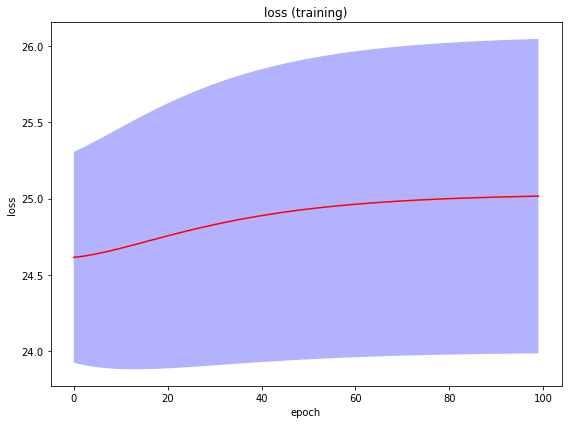


################################################################################
#
# RESULT # 02
#
################################################################################



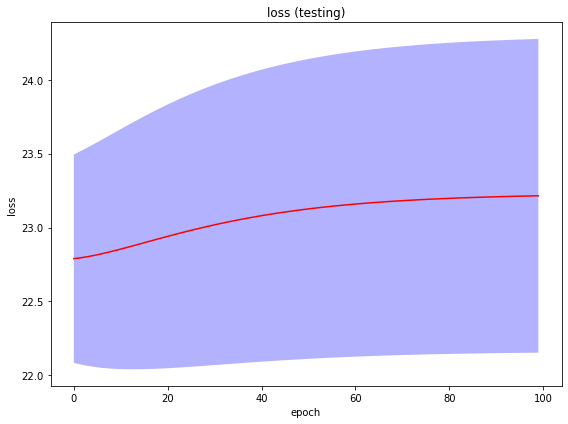


################################################################################
#
# RESULT # 03
#
################################################################################



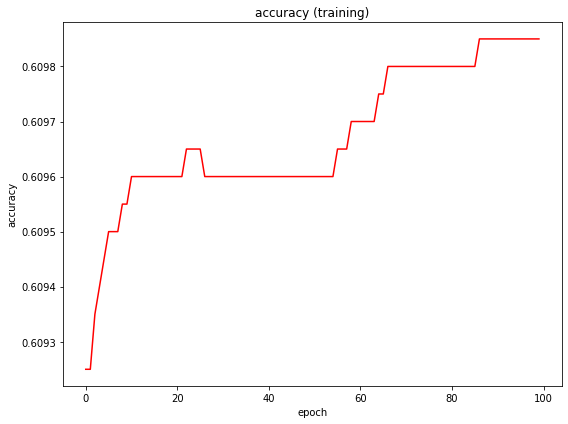


################################################################################
#
# RESULT # 04
#
################################################################################



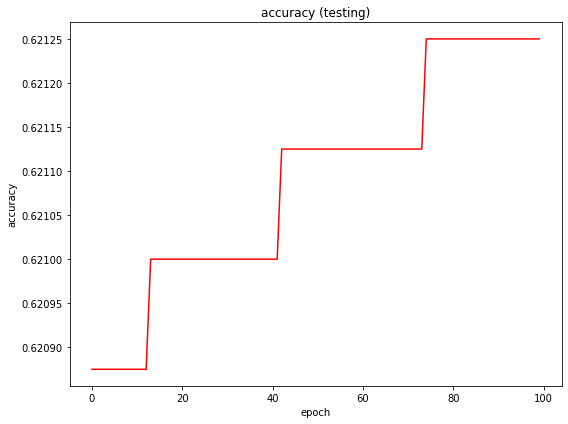


################################################################################
#
# RESULT # 05
#
################################################################################

final training accuracy = 0.60985000

################################################################################
#
# RESULT # 06
#
################################################################################

final testing accuracy = 0.62125000


In [79]:
number_result = 6 

for i in range(number_result):

    title           = '# RESULT # {:02d}'.format(i+1) 
    name_function   = 'function_result_{:02d}()'.format(i+1)

    print('') 
    print('################################################################################')
    print('#') 
    print(title)
    print('#') 
    print('################################################################################')
    print('') 

    eval(name_function)